In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("properties_2016.csv",low_memory=False)

In [2]:
# Now checking the number of rows and columns in the dataset

In [3]:
no_of_rows,no_of_col = dataset.shape
print(no_of_rows,no_of_col)

2985217 58


In [4]:
# Checking that some of the columns have very very less values to be taken into account

In [5]:
print(dataset['buildingclasstypeid'].count())
print(dataset['architecturalstyletypeid'].count())
print(dataset['decktypeid'].count())
print(dataset['fireplaceflag'].count())
print(dataset['storytypeid'].count())
print(dataset['typeconstructiontypeid'].count())
print(dataset['yardbuildingsqft26'].count())
print(dataset['finishedsquarefeet13'].count())
print(dataset['finishedsquarefeet6'].count())
print(dataset['basementsqft'].count())

12629
6061
17096
5163
1624
6747
2647
7672
22001
1628


In [6]:
# As values are very less in these columns, so dropping these

In [7]:
for column in list(dataset):
    if dataset[column].count() < 0.05*no_of_rows:
        dataset.drop(column,axis=1,inplace = True)
no_of_rows,no_of_col = dataset.shape
print(no_of_rows,no_of_col)

2985217 41


In [8]:
# Now dropping those columns having all Nan values

In [9]:
dataset.dropna(inplace=True, how="all", axis=1)
no_of_rows,no_of_col = dataset.shape
print(no_of_rows,no_of_col)

2985217 41


In [10]:
# Lets look how the data looks like now

In [11]:
dataset.head(10)

,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet15,...,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,10754147,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN
1,10759547,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN
2,10843547,NaN,0.0,0.0,NaN,NaN,NaN,73026.0,NaN,73026.0,...,NaN,2.0,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN
3,10859147,NaN,0.0,0.0,7.0,NaN,NaN,5068.0,NaN,5068.0,...,NaN,NaN,1948.0,1.0,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN
4,10879947,NaN,0.0,0.0,NaN,NaN,NaN,1776.0,NaN,1776.0,...,NaN,1.0,1947.0,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN
5,10898347,NaN,0.0,0.0,7.0,NaN,NaN,2400.0,NaN,2400.0,...,NaN,NaN,1943.0,1.0,176383.0,283315.0,2015.0,106932.0,3661.28,NaN
6,10933547,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.34,NaN
7,10940747,NaN,0.0,0.0,NaN,NaN,NaN,3611.0,NaN,3611.0,...,NaN,NaN,1946.0,1.0,101998.0,688486.0,2015.0,586488.0,7857.84,NaN
8,10954547,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN
9,10976347,NaN,0.0,0.0,7.0,NaN,NaN,3754.0,NaN,3754.0,...,NaN,NaN,1978.0,1.0,218440.0,261201.0,2015.0,42761.0,4054.76,NaN


In [12]:
df = dataset.copy()

In [13]:
df.shape

(2985217, 41)

In [14]:
# Now i want to calcuate pearson correlation between different columns and then plotting heatmap between interesting 
# variables

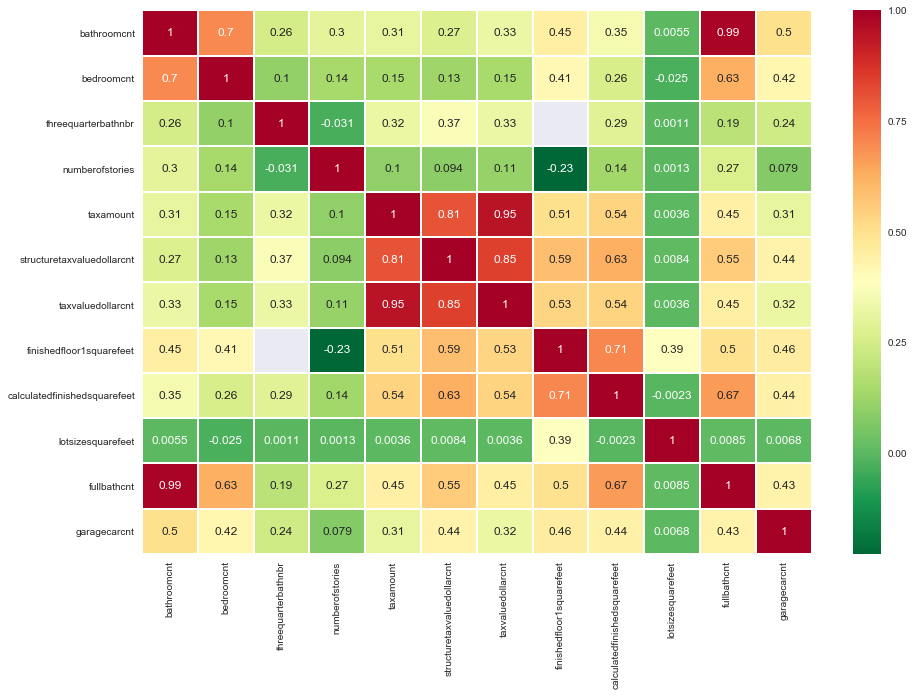

In [15]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
col_list = ['bathroomcnt','bedroomcnt','threequarterbathnbr','numberofstories','taxamount',\
                                "structuretaxvaluedollarcnt","taxvaluedollarcnt","finishedfloor1squarefeet",\
                                "calculatedfinishedsquarefeet","lotsizesquarefeet",\
                                "fullbathcnt","garagecarcnt"]
features_for_coeff = df.filter(col_list, axis=1)
corr_table = features_for_coeff.corr(method='pearson',min_periods=10)
sb.heatmap(corr_table,cmap='RdYlGn_r', linewidths=1, annot=True,xticklabels=col_list,yticklabels=col_list)
size = plt.gcf()
size.set_size_inches(15,10)
plt.show()

In [16]:
# Results:
#     Positively Correlated values:
#         "bedroomcnt" and "bathroomcnt" = 0.7
#         "taxamount" and "structuretaxvaluedollarcnt" = 0.81
#         "structuretaxvaluedollarcnt" and "calculatedfinishedsquarefeet" = 0.63
#         "taxamount" and "taxvaluedollarcnt" = 0.95
#         "bathroomcnt" and "fullbathcnt" = 0.99
#         "taxamount" and "finishedfloor1squarefeet" = 0.51
#         "finishedfloor1squarefeet" and "calculatedfinishedsquarefeet" = 0.71
#         "fullbathcnt" and "calculatedfinishedsquarefeet" = 0.67
        
#     Negatively and Weakly Correlated Values:
#         "bedroomcnt" and "lotsizesquarefeet" = -0.025
#         "threequarterbathnbr" and "numberofstories" = -0.031
#         "numberofstories" and "finishedfloor1squarefeet" = -0.23
#         "bedroomcnt" and "numberofstories" = 0.14
#         "bathroomcnt" and "numberofstories" 0.30
#         "bathroomcnt" and "threequarterbathnbr" = 0.26
#         "taxamount" and "numberofstories" 0.1
        
# Maximum:
#             "bathroomcnt" and "fullbathcnt" = 0.99
#         "numberofstories" and "finishedfloor1squarefeet" = -0.23    

# Some Interesting Observations:
#     1.)Most of the bathroom are full bathroom as "bathroomcnt" is highly related with "fullbathcnt" and weakly related 
#     with "threequarterbathnbr"
#     2.)"taxamount", "bedroomcnt", "bathroomcnt" doesn not increase with increase in  "numberofstories" as they are weakly
#     related with "numberofstories"
#     3.)"bedroomcnt" is negatively related with "lotsizesquarefeet"


In [17]:
# Now trimming the data by sampling or taking 1 row from every 25 rows and putting the result 
# in df_trim for 2nd question.

In [18]:
df_trim = df[0:no_of_rows:25].copy()

In [19]:
# Now in below cell I am replacing Nan values with mean of remaining values of the column and putting the 
# result in df_fill

In [20]:
df_fill = df_trim.fillna(np.floor(df_trim.mean())).copy()

In [21]:
print(df_fill.shape)

(119409, 41)


In [22]:
# Now our data looks like this:

In [23]:
df_fill.head(10)

,parcelid,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet15,...,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,10754147,1.0,0.0,0.0,5.0,2.0,1380.0,1833.0,1765.0,2762.0,...,1.0,1.0,1964.0,1.0,170999.0,9.0,2015.0,9.0,5369.00,6.048412e+13
25,11457547,1.0,0.0,0.0,5.0,2.0,1380.0,1833.0,1765.0,2762.0,...,1.0,1.0,1964.0,1.0,170999.0,124.0,2015.0,124.0,5369.00,6.048412e+13
50,11823747,1.0,0.0,0.0,4.0,2.0,1380.0,3230.0,1765.0,3230.0,...,1.0,2.0,1927.0,1.0,42184.0,94118.0,2015.0,51934.0,1439.04,6.048412e+13
75,12171147,1.0,0.0,0.0,7.0,2.0,1380.0,2098.0,1765.0,2098.0,...,1.0,1.0,1929.0,1.0,19354.0,43809.0,2015.0,24455.0,1112.02,6.048412e+13
100,12592347,1.0,0.0,0.0,5.0,2.0,1380.0,1833.0,1765.0,2762.0,...,1.0,1.0,1964.0,1.0,170999.0,55570.0,2015.0,55570.0,699.37,6.048412e+13
125,13114747,1.0,0.0,0.0,5.0,2.0,1380.0,740.0,740.0,2762.0,...,1.0,1.0,1961.0,1.0,170999.0,419616.0,2015.0,251470.0,33.91,6.048412e+13
150,13119747,1.0,0.0,0.0,5.0,2.0,1380.0,1600.0,1600.0,2762.0,...,1.0,1.0,1977.0,1.0,170999.0,419616.0,2015.0,251470.0,305.16,6.048412e+13
175,13124747,1.0,0.0,0.0,5.0,2.0,1380.0,1008.0,1008.0,2762.0,...,1.0,1.0,1991.0,1.0,170999.0,419616.0,2015.0,251470.0,275.32,6.048412e+13
200,13129747,1.0,0.0,0.0,5.0,2.0,1380.0,1392.0,1392.0,2762.0,...,1.0,1.0,1972.0,1.0,170999.0,419616.0,2015.0,251470.0,198.58,6.048412e+13
225,13134747,1.0,0.0,0.0,5.0,2.0,1380.0,960.0,960.0,2762.0,...,1.0,1.0,1984.0,1.0,170999.0,419616.0,2015.0,251470.0,167.64,6.048412e+13


In [24]:
# Now we plotting 5 graphs between different variables:

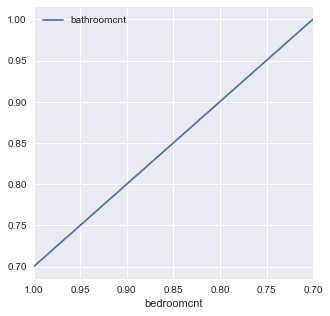

In [25]:
col_list = ['bedroomcnt','bathroomcnt']
features_to_be_plotted = df_fill.filter(col_list, axis=1)
heatmap_col = features_to_be_plotted.corr(method='pearson',min_periods=10)
heatmap_col.plot(x='bedroomcnt', y='bathroomcnt',figsize=(5,5))
plt.show()

In [26]:
# 1.)Line plot:
#     A line plot is drawn between the correlation coefficient between "bedrromcnt" and "bathroomcnt" as if we draw 
#     between actual data points the graph gets filled with blue color representing each (x,y) in dataset and nothing
#     was clear.
#     This represents the relationship between "bedroomcnt" and "bathroomcnt".
#     This variables are positively corelated with each other.
#     It shows that as the numner of bedroom increases, the number of bathroom also increses which is necessary.

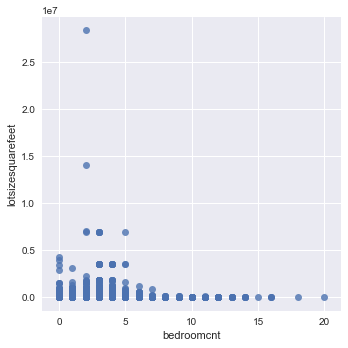

In [27]:
col_list = ['bedroomcnt','lotsizesquarefeet']
features_to_be_plotted = df_fill.filter(col_list, axis=1)
sb.lmplot(x='bedroomcnt', y='lotsizesquarefeet', data=features_to_be_plotted,fit_reg=False)
plt.show()

In [28]:
# Lmplot:
#     This is a graph between "bedroomcnt" and "lotsizesquarefeet".
#     The two variables are not related with each other which seems strange as the "lotsizesquarefeet" is not related to
#     number of bedrooms. So maybe the bedrooms are built on above floors duw to which the number of bedroom increases
#     and size remains same.

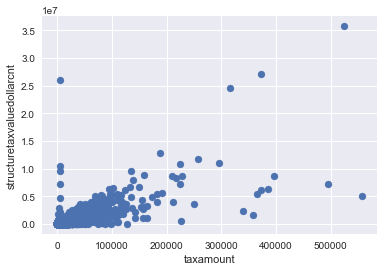

In [29]:
col_list = ['taxamount','structuretaxvaluedollarcnt']
features_to_be_plotted = df_fill.filter(col_list, axis=1)
plt.scatter(y="structuretaxvaluedollarcnt",x="taxamount",data=features_to_be_plotted)
plt.ylabel("structuretaxvaluedollarcnt")
plt.xlabel("taxamount")
plt.show()

In [30]:
# 3.) ScatterPlot:
#     The graph is between "taxamount" and "structuretaxvaluedollarcnt".
#     As visible from the graph "structuretaxvaluedollarcnt" is increasing with increase in "taxamount".
#     Also there are some outliers in graph where for some houses taxmount is less and structuretaxvaluedollarcnt is 
#     enormous.

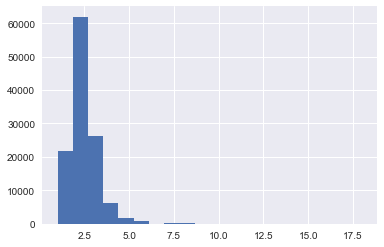

In [31]:
plt.hist(df_fill.fullbathcnt,bins=20)
plt.show()

In [32]:
# Histogram:
#     This histogram shows the frequency of full bathroom in the houses.
#     The sum of these houses reaches almost to total number of bathroomcnt which shows that most of the bathrooms
#     are full bathrooms and not 3/4 bathrooms.

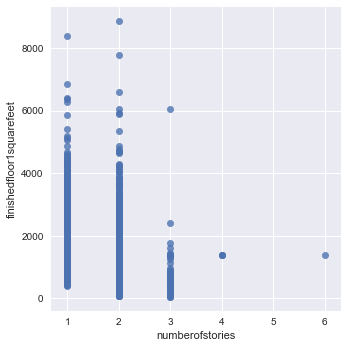

In [33]:
col_list = ['numberofstories','finishedfloor1squarefeet']
features_to_be_plotted = df_fill.filter(col_list, axis=1)
sb.lmplot(x='numberofstories', y='finishedfloor1squarefeet', data=features_to_be_plotted,fit_reg=False)
plt.show()

In [34]:
# Lmplot:
#     This plot is between "numberofstories" and "finishedfloor1squarefeet".
#     We can see that for houses with 1 or 2 stories the finisded square feet on first floor is more but after that 
#     the finished square feet on floor 1 is below 2K mostly.

In [35]:
# Now we are going to make a simple linear regression model to predict the log error.

In [36]:
train_df = pd.read_csv("train_2016_v2.csv",low_memory=False)

In [37]:
rows_train,col_train = train_df.shape
print(rows_train,col_train)

90275 3


In [38]:
# Now setting the parcelID as index as it is common to both tables

In [39]:
train_df.set_index("parcelid",inplace=True)
dataset.set_index("parcelid",inplace=True)

In [40]:
data_join = train_df.join(dataset, lsuffix='_trainer', rsuffix='_original',how="left")
print(data_join.shape)
data_join.head(10)

(90275, 42)


,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,...,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,
10711738,0.0276,8/2/16,1.0,3.0,4.0,4.0,3.0,NaN,2538.0,2538.0,...,NaN,1.0,1978.0,NaN,245180.0,567112.0,2015.0,321932.0,7219.18,6.037113e+13
10711755,-0.0182,8/2/16,1.0,3.0,3.0,4.0,3.0,NaN,1589.0,1589.0,...,NaN,1.0,1959.0,NaN,254691.0,459844.0,2015.0,205153.0,6901.09,6.037113e+13
10711805,-0.1009,5/3/16,1.0,2.0,3.0,4.0,2.0,NaN,2411.0,2411.0,...,NaN,1.0,1973.0,NaN,235114.0,384787.0,2015.0,149673.0,4876.61,6.037113e+13
10711816,-0.0121,4/5/16,1.0,2.0,4.0,4.0,2.0,NaN,2232.0,2232.0,...,NaN,1.0,1973.0,NaN,262309.0,437176.0,2015.0,174867.0,5560.07,6.037113e+13
10711858,-0.0481,7/15/16,1.0,2.0,4.0,4.0,2.0,NaN,1882.0,1882.0,...,NaN,1.0,1973.0,NaN,232037.0,382055.0,2015.0,150018.0,4878.25,6.037113e+13
10711910,0.2897,8/30/16,NaN,2.0,3.0,4.0,2.0,NaN,1477.0,1477.0,...,NaN,1.0,1960.0,NaN,57098.0,76860.0,2015.0,19762.0,1116.46,6.037113e+13
10712086,0.0040,2/12/16,1.0,2.0,4.0,4.0,2.0,NaN,1850.0,1850.0,...,NaN,1.0,1974.0,NaN,206239.0,384120.0,2015.0,177881.0,4867.79,6.037113e+13
10712162,-0.0121,9/27/16,1.0,3.0,3.0,4.0,3.0,NaN,3193.0,3193.0,...,NaN,1.0,1964.0,NaN,464000.0,695000.0,2015.0,231000.0,9793.72,6.037113e+13
10712163,0.0139,8/23/16,1.0,3.0,4.0,4.0,3.0,NaN,2421.0,2421.0,...,NaN,1.0,1962.0,NaN,302104.0,618279.0,2015.0,316175.0,7798.07,6.037113e+13


In [41]:
data_join = data_join.fillna(np.floor(data_join.mean())).copy()
data_join.fillna(0,inplace=True)
data_join.head(10)

,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,...,threequarterbathnbr,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,
10711738,0.0276,8/2/16,1.0,3.0,4.0,4.0,3.0,1347.0,2538.0,2538.0,...,1.0,1.0,1978.0,1.0,245180.0,567112.0,2015.0,321932.0,7219.18,6.037113e+13
10711755,-0.0182,8/2/16,1.0,3.0,3.0,4.0,3.0,1347.0,1589.0,1589.0,...,1.0,1.0,1959.0,1.0,254691.0,459844.0,2015.0,205153.0,6901.09,6.037113e+13
10711805,-0.1009,5/3/16,1.0,2.0,3.0,4.0,2.0,1347.0,2411.0,2411.0,...,1.0,1.0,1973.0,1.0,235114.0,384787.0,2015.0,149673.0,4876.61,6.037113e+13
10711816,-0.0121,4/5/16,1.0,2.0,4.0,4.0,2.0,1347.0,2232.0,2232.0,...,1.0,1.0,1973.0,1.0,262309.0,437176.0,2015.0,174867.0,5560.07,6.037113e+13
10711858,-0.0481,7/15/16,1.0,2.0,4.0,4.0,2.0,1347.0,1882.0,1882.0,...,1.0,1.0,1973.0,1.0,232037.0,382055.0,2015.0,150018.0,4878.25,6.037113e+13
10711910,0.2897,8/30/16,1.0,2.0,3.0,4.0,2.0,1347.0,1477.0,1477.0,...,1.0,1.0,1960.0,1.0,57098.0,76860.0,2015.0,19762.0,1116.46,6.037113e+13
10712086,0.0040,2/12/16,1.0,2.0,4.0,4.0,2.0,1347.0,1850.0,1850.0,...,1.0,1.0,1974.0,1.0,206239.0,384120.0,2015.0,177881.0,4867.79,6.037113e+13
10712162,-0.0121,9/27/16,1.0,3.0,3.0,4.0,3.0,1347.0,3193.0,3193.0,...,1.0,1.0,1964.0,1.0,464000.0,695000.0,2015.0,231000.0,9793.72,6.037113e+13
10712163,0.0139,8/23/16,1.0,3.0,4.0,4.0,3.0,1347.0,2421.0,2421.0,...,1.0,1.0,1962.0,1.0,302104.0,618279.0,2015.0,316175.0,7798.07,6.037113e+13


In [42]:
# Some more cleaning.
# "calculatedbathnbr" and "bathroomcnt" are same. So droping it.
# "finishedfloor1squarefeet" and "finishedsquarefeet50" are same.
# I am not using 'latitude' and "longitude" in my model. So dropping these.
# I am not using 'fips',"rawcensustractandblock","regionidcity", "regionidcounty","regionidneighborhood",
# "regionidzipin", "censustractandblock", "propertycountylandusecode" and
# 'propertyzoningdesc'in my model. So dropping these.

In [43]:
data_join.drop("calculatedbathnbr",axis=1,inplace=True)
data_join.drop("finishedsquarefeet50",axis=1,inplace=True)
data_join.drop("latitude",axis=1,inplace=True)
data_join.drop("fips",axis=1,inplace=True)
data_join.drop("longitude",axis=1,inplace=True)
data_join.drop("rawcensustractandblock",axis=1,inplace=True)
data_join.drop("regionidcity",axis=1,inplace=True)
data_join.drop("regionidcounty",axis=1,inplace=True)
data_join.drop("regionidneighborhood",axis=1,inplace=True)
data_join.drop("regionidzip",axis=1,inplace=True)
data_join.drop("censustractandblock",axis=1,inplace=True)
data_join.drop("propertycountylandusecode",axis=1,inplace=True)
data_join.drop("propertyzoningdesc",axis=1,inplace=True)
data_join.drop("pooltypeid7",axis=1,inplace=True)

In [44]:
data_join.shape

(90275, 28)

In [45]:
# Now using the Statsmodels api to do simple linear regression.
# First lets cal

In [46]:
list(data_join.columns)

['logerror',
 'transactiondate',
 'airconditioningtypeid',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet15',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'heatingorsystemtypeid',
 'lotsizesquarefeet',
 'poolcnt',
 'propertylandusetypeid',
 'roomcnt',
 'threequarterbathnbr',
 'unitcnt',
 'yearbuilt',
 'numberofstories',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount']

In [48]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [49]:
# Method to calculate the constant to be used in linear regressin model.
# The formula is ymean - xmean* (pear_coeff*(y_SD/x_SD))

In [50]:
def calculateConstant(columnname):
    y_mean = data_join['logerror'].mean()
    x_mean = data_join[columnname].mean()
    x_SD = data_join[columnname].std(skipna=True)
    y_SD = data_join['logerror'].std(skipna=True)
    regress_list = ['logerror',columnname]
    regress_features = data_join.filter(regress_list,axis=1)
    pearson_coff = regress_features.corr(method='pearson')
    pear = pearson_coff.iloc[0][columnname]

    constant = y_mean - x_mean*(pear*(y_SD/x_SD))
    return constant

In [51]:
# Now evaluating the model on different independent variables:

In [52]:
lst = ["bedroomcnt","calculatedfinishedsquarefeet"]
X = data_join[lst]
y = data_join["logerror"]
sm.add_constant(calculateConstant('calculatedfinishedsquarefeet'))
sm.add_constant(calculateConstant('bedroomcnt'))

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(predictions.head(10))
print("Mean Absolute Error is :"  '%s'% mean_absolute_error(y,predictions))
model.summary()

parcelid
10711738    0.016542
10711755    0.010429
10711805    0.015597
10711816    0.014617
10711858    0.012417
10711910    0.009724
10712086    0.012215
10712162    0.020515
10712163    0.015806
10712195    0.010988
dtype: float64
Mean Absolute Error is :0.0682686012309


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     295.1
Date:                Wed, 27 Sep 2017   Prob (F-statistic):          1.73e-128
Time:                        11:59:34   Log-Likelihood:                 36802.
No. Observations:               90275   AIC:                        -7.360e+04
Df Residuals:                   90273   BIC:                        -7.358e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bedroomcnt                       0.0001      0.000      0.324      0.746      -0.001       0.001
calculatedfinishedsquarefeet  6.288e-06   7.29e-07      8.630      0.000    4.86e-06    7.72e-06
==============================================================================
Omnibus:                    66011.500   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         64939808.343
Skew:                           2.158   Prob(JB):                         0.00
Kurtosis:                     134.324   Cond. No.                     1.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
lst = ["garagetotalsqft"]
X = data_join[lst]
y = data_join["logerror"]
sm.add_constant(calculateConstant('garagetotalsqft'))
sm.add_constant(calculateConstant('bedroomcnt'))

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(predictions.head(10))
print("Mean Absolute Error is :"  '%s'% mean_absolute_error(y,predictions))
model.summary()

parcelid
10711738    0.010242
10711755    0.010242
10711805    0.010242
10711816    0.010242
10711858    0.010242
10711910    0.010242
10712086    0.010242
10712162    0.010242
10712163    0.010242
10712195    0.010242
dtype: float64
Mean Absolute Error is :0.0684839390914


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     437.8
Date:                Wed, 27 Sep 2017   Prob (F-statistic):           5.64e-97
Time:                        11:59:38   Log-Likelihood:                 36726.
No. Observations:               90275   AIC:                        -7.345e+04
Df Residuals:                   90274   BIC:                        -7.344e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
garagetotalsqft  2.969e-05   1.42e-06     20.923      0.000    2.69e-05    3.25e-05
==============================================================================
Omnibus:                    66055.893   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         64837724.371
Skew:                           2.162   Prob(JB):                         0.00
Kurtosis:                     134.220   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# So I ran this linear regression model on different variables:
#     The result is in order:
#     Name                                            RMS         R-Squared
#     bedroomcnt                                      0.0         0.006
#     bathroomcnt                                     0.0         0.006
#     garagetotalsqft                                 1.42e-06    0.05
#     garagecarcnt                                    0.0         0.005
#     lotsizesquarefeet                               4.54 e-10   0.00
#     taxamount                                       5.91e-8     0.002
#     yearbuilt                                       2.72e-7     0.005
#     calculatedfinishedsquarefeet                    2.68e-7     0.006

# So by this predictors like bedroomcnt,garagetotalsqft, calculatedfinishedsquarefeet and bathroomcnt seems to important.

In [55]:
# Now I am calculating the z_score for some the columns and adding them into the dataframe.
# Now I will run the prediction on z scores.

In [56]:
lst = ["bedroomcnt","bathroomcnt","garagecarcnt","garagetotalsqft","yearbuilt","finishedsquarefeet15","taxamount","lotsizesquarefeet","calculatedfinishedsquarefeet"]
for col in lst:
    col_zscore = col + '_zscore'
    data_join[col_zscore] = (data_join[col] - data_join[col].mean())/data_join[col].std(ddof=0)
lst1 = ["bedroomcnt_zscore","bathroomcnt_zscore","garagecarcnt_zscore","yearbuilt_zscore","taxamount_zscore","lotsizesquarefeet_zscore"]
X = data_join[lst1]
y = data_join["logerror"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     21.37
Date:                Wed, 27 Sep 2017   Prob (F-statistic):           3.17e-25
Time:                        11:59:43   Log-Likelihood:                 36572.
No. Observations:               90275   AIC:                        -7.313e+04
Df Residuals:                   90269   BIC:                        -7.308e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
bedroomcnt_zscore            0.0023      0.001      3.020      0.003       0.001       0.004
bathroomcnt_zscore           0.0042      0.001      4.853      0.000       0.002       0.006
garagecarcnt_zscore          0.0003      0.001      0.567      0.571      -0.001       0.001
yearbuilt_zscore             0.0014      0.001      2.258      0.024       0.000       0.003
taxamount_zscore            -0.0037      0.001     -6.095      0.000      -0.005      -0.003
lotsizesquarefeet_zscore     0.0008      0.001      1.416      0.157      -0.000       0.002
==============================================================================
Omnibus:                    66717.245   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         65515392.304
Skew:                           2.204   Prob(JB):                         0.00
Kurtosis:                     134.902   Cond. No.                         3.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# The R-sqaured value has even decreased after calculating the z score.Normalizing does not seems to improve this model.

In [58]:
data_join.drop(lst1,inplace=True)
data_join.shape

(90275, 37)

In [59]:
# Now just trying the linear regession model from sklearn library. The Mean Absolute Error is :0.0675226326885 which
#     is a little bit less than the error in statsmodel linear regression model.

In [60]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
regress_type = linear_model.LinearRegression()
lst = ["bedroomcnt","garagetotalsqft","calculatedfinishedsquarefeet"]
x1 = data_join.filter(lst)
y1 = data_join.filter(["logerror"])
(x_train_data,x_test_data,y_train_data,y_test_data) = train_test_split(x1,y1,test_size=0.20,random_state=1)
dx_train = pd.DataFrame(x_train_data)
dy_train = pd.DataFrame(y_train_data)

regress_type.fit(dx_train,dy_train)
y_predict = regress_type.predict(x_test_data)
cc = pd.DataFrame(y_predict)
print("Mean Absolute Error is :"  '%s'% mean_absolute_error(y_test_data,cc))

Mean Absolute Error is :0.0675226326885


In [61]:
# Now trying the Decision Tree Regressor model from sklern api on the independent variables. Dividing the data 
# into 80% training data and 20% test data. The Mean Absolute Error is :0.0900226008021 which has increased from 
# linear regression model. So it is not performing better even after running it on z scores.

In [62]:
from sklearn import tree

regress_type = tree.DecisionTreeRegressor(random_state=10)
lst = ["bedroomcnt","garagetotalsqft","calculatedfinishedsquarefeet"]
d1 = data_join.filter(lst)
c1 = data_join.filter(["logerror"])
(x_train_data,x_test_data,y_train_data,y_test_data) = train_test_split(d1,c1,test_size=0.20,random_state=1)
dx1 = pd.DataFrame(x_train_data)
dy1 = pd.DataFrame(y_train_data)
dx2 = pd.DataFrame(x_test_data)
dy2 = pd.DataFrame(y_test_data)

regress_type.fit(x_train_data,y_train_data)
pred_y = regress_type.predict(x_test_data)
cc = pd.DataFrame(pred_y)
cc = cc.rename(columns={0: 'logerror'})

print("Mean Absolute Error is :"  '%s'% mean_absolute_error(y_test_data,cc))
y_test_data.head(10)

Mean Absolute Error is :0.0900226008021


,logerror
parcelid,
17142427,0.0100
12814821,-0.0010
13854200,-0.0090
12012762,0.0237
11476639,0.0020
14725017,0.0266
10798134,-0.0408
11343587,-0.0182
17057554,0.0526


In [63]:
# Z- Scores

In [64]:
lst = ["bedroomcnt","bathroomcnt","garagecarcnt","yearbuilt","taxamount","lotsizesquarefeet",\
       "finishedsquarefeet15","garagecarcnt","garagetotalsqft","calculatedfinishedsquarefeet"]
for col in lst:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

In [65]:
list(df.columns)

['parcelid',
 'airconditioningtypeid',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'threequarterbathnbr',
 'unitcnt',
 'yearbuilt',
 'numberofstories',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'bedroomcnt_zscore',
 'bathroomcnt_zscore',
 'garagecarcnt_zscore',
 'yearbuilt_zscore',
 'taxamount_zscore',
 'lotsizesquarefeet_zscore',
 'finishedsquarefeet15

In [66]:
lst = ["parcelid","bedroomcnt_zscore","garagetotalsqft_zscore","calculatedfinishedsquarefeet_zscore"]
ds_feature = df.filter(lst) 

In [67]:
ds_feature.fillna(np.floor(ds_feature.mean()), inplace=True)
ds_final = ds_feature.set_index("parcelid").copy()
ds_final.head(10)

,bedroomcnt_zscore,garagetotalsqft_zscore,calculatedfinishedsquarefeet_zscore
parcelid,,,
10754147,-2.421075,-1.0,0.000000
10759547,-2.421075,-1.0,0.000000
10843547,-2.421075,-1.0,39.124967
10859147,-2.421075,-1.0,1.780895
10879947,-2.421075,-1.0,-0.028114
10898347,-2.421075,-1.0,0.314784
10933547,-2.421075,-1.0,0.000000
10940747,-2.421075,-1.0,0.980249
10954547,-2.421075,-1.0,0.000000


In [ ]:
# Now predicting using DecisionTreeRegressor model on entire entire dataset after training. This gave me a score of
# 0.0.81 on Kaggle with rank of around 2900

In [68]:
pred_y = regress_type.predict(ds_final)
cc = pd.DataFrame(pred_y)
print(cc.shape)
cc.head(10)

(2985217, 1)


,0
0,2.544
1,2.544
2,2.544
3,2.544
4,2.544
5,2.544
6,2.544
7,2.544
8,2.544
9,2.544


In [69]:
lst = ["parcelid"]
dd = ds_feature.filter(lst)
dd.head(10)
result = pd.concat([dd, cc], axis=1)
result.head(10)
result = result.rename(columns={0: '201610'})
result["201611"] = result["201610"]
result["201612"] = result["201610"]
result["201710"] = result["201610"]
result["201711"] = result["201610"]
result["201712"] = result["201610"]
result.set_index("parcelid",inplace=True)
result.head(10)
result.shape

(2985217, 6)

In [ ]:
# Submitted this csv to Kaggle

In [ ]:
result.to_csv("predictions.csv")

In [ ]:
# Now predicting throught StatsModel linera regression model using the Z scores

In [70]:
lst = ["bedroomcnt_zscore","garagetotalsqft_zscore","calculatedfinishedsquarefeet_zscore"]
X = data_join.filter(lst) 
y = data_join["logerror"]
# c = sm.add_constant(constant)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
predeict_df = pd.DataFrame(predictions)
print(predeict_df.head(10))

                 0
parcelid          
10711738  0.005409
10711755 -0.001209
10711805  0.004124
10711816  0.003424
10711858  0.001154
10711910 -0.001936
10712086  0.000946
10712162  0.009197
10712163  0.004650
10712195 -0.000632


In [72]:
ds_final.head(10)

,bedroomcnt_zscore,garagetotalsqft_zscore,calculatedfinishedsquarefeet_zscore
parcelid,,,
10754147,-2.421075,-1.0,0.000000
10759547,-2.421075,-1.0,0.000000
10843547,-2.421075,-1.0,39.124967
10859147,-2.421075,-1.0,1.780895
10879947,-2.421075,-1.0,-0.028114
10898347,-2.421075,-1.0,0.314784
10933547,-2.421075,-1.0,0.000000
10940747,-2.421075,-1.0,0.980249
10954547,-2.421075,-1.0,0.000000


In [73]:
pred_y = model.predict(ds_final)
pred_df = pd.DataFrame(pred_y)
print(pred_df.shape)
pred_df.head(10)
pred_df = pred_df.rename(columns={0: '201610'})
pred_df["201611"] = pred_df["201610"]
pred_df["201612"] = pred_df["201610"]
pred_df["201710"] = pred_df["201610"]
pred_df["201711"] = pred_df["201610"]
pred_df["201712"] = pred_df["201610"]
# result.set_index("parcelid",inplace=True)
print(pred_df.head(10))
pred_df.shape

(2985217, 1)
            201610    201611    201612    201710    201711    201712
parcelid                                                            
10754147 -0.000862 -0.000862 -0.000862 -0.000862 -0.000862 -0.000862
10759547 -0.000862 -0.000862 -0.000862 -0.000862 -0.000862 -0.000862
10843547  0.233870  0.233870  0.233870  0.233870  0.233870  0.233870
10859147  0.009823  0.009823  0.009823  0.009823  0.009823  0.009823
10879947 -0.001030 -0.001030 -0.001030 -0.001030 -0.001030 -0.001030
10898347  0.001027  0.001027  0.001027  0.001027  0.001027  0.001027
10933547 -0.000862 -0.000862 -0.000862 -0.000862 -0.000862 -0.000862
10940747  0.005019  0.005019  0.005019  0.005019  0.005019  0.005019
10954547 -0.000862 -0.000862 -0.000862 -0.000862 -0.000862 -0.000862
10976347  0.005491  0.005491  0.005491  0.005491  0.005491  0.005491


(2985217, 6)

In [ ]:
pred_df.to_csv("predictions_new_new_new.csv")

In [ ]:
# This gave me score of 0.66 on kaggle

In [ ]:
# Now I tried submitting by changing independent variables. I was getting good score on these variables.
# Submitted without taking Z scores.

In [74]:
lst = ["bedroomcnt","garagetotalsqft","calculatedfinishedsquarefeet"]
X = data_join.filter(lst) 
y = data_join["logerror"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
predeict_df = pd.DataFrame(predictions)
print(predeict_df.head(10))

                 0
parcelid          
10711738  0.016829
10711755  0.010298
10711805  0.015629
10711816  0.014844
10711858  0.012574
10711910  0.009572
10712086  0.012367
10712162  0.020701
10712163  0.016070
10712195  0.010875


In [75]:
lst = ["parcelid","bedroomcnt","garagetotalsqft","calculatedfinishedsquarefeet"]
ds_feature = df.filter(lst) 
ds_feature.fillna(np.floor(ds_feature.mean()), inplace=True)
ds_final = ds_feature.set_index("parcelid").copy()
ds_final.head(10)

,bedroomcnt,garagetotalsqft,calculatedfinishedsquarefeet
parcelid,,,
10754147,0.0,383.0,1827.0
10759547,0.0,383.0,1827.0
10843547,0.0,383.0,73026.0
10859147,0.0,383.0,5068.0
10879947,0.0,383.0,1776.0
10898347,0.0,383.0,2400.0
10933547,0.0,383.0,1827.0
10940747,0.0,383.0,3611.0
10954547,0.0,383.0,1827.0


In [77]:
pred_y = model.predict(ds_final)
pred_df = pd.DataFrame(pred_y)
print(pred_df.shape)
pred_df.head(10)
pred_df = pred_df.rename(columns={0: '201610'})
pred_df["201611"] = pred_df["201610"]
pred_df["201612"] = pred_df["201610"]
pred_df["201710"] = pred_df["201610"]
pred_df["201711"] = pred_df["201610"]
pred_df["201712"] = pred_df["201610"]
print(pred_df.head(10))
pred_df.shape
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,predeict_df)

(2985217, 1)
            201610    201611    201612    201710    201711    201712
parcelid                                                            
10754147  0.010588  0.010588  0.010588  0.010588  0.010588  0.010588
10759547  0.010588  0.010588  0.010588  0.010588  0.010588  0.010588
10843547  0.472347  0.472347  0.472347  0.472347  0.472347  0.472347
10859147  0.031608  0.031608  0.031608  0.031608  0.031608  0.031608
10879947  0.010257  0.010257  0.010257  0.010257  0.010257  0.010257
10898347  0.014304  0.014304  0.014304  0.014304  0.014304  0.014304
10933547  0.010588  0.010588  0.010588  0.010588  0.010588  0.010588
10940747  0.022158  0.022158  0.022158  0.022158  0.022158  0.022158
10954547  0.010588  0.010588  0.010588  0.010588  0.010588  0.010588
10976347  0.023086  0.023086  0.023086  0.023086  0.023086  0.023086


0.068259422730598054

In [ ]:
pred_df.to_csv("new_predictions.csv")

In [ ]:
# This gave me a score of 0.64 on kaggle which was good.

In [89]:
lst = ["parcelid","bedroomcnt","lotsizesquarefeet","calculatedfinishedsquarefeet"]
ds_feature = df.filter(lst) 
ds_feature.fillna(np.floor(ds_feature.mean()), inplace=True)
ds_final = ds_feature.set_index("parcelid").copy()
ds_final.head(10)
pred_y = model.predict(ds_final)
pred_df = pd.DataFrame(pred_y)
print(pred_df.shape)
pred_df.head(10)
pred_df = pred_df.rename(columns={0: '201610'})
pred_df["201611"] = pred_df["201610"]
pred_df["201612"] = pred_df["201610"]
pred_df["201710"] = pred_df["201610"]
pred_df["201711"] = pred_df["201610"]
pred_df["201712"] = pred_df["201610"]
print(pred_df.head(10))
pred_df.shape
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,predeict_df)

(2985217, 1)
            201610    201611    201612    201710    201711    201712
parcelid                                                            
10754147 -0.270469 -0.270469 -0.270469 -0.270469 -0.270469 -0.270469
10759547 -0.001591 -0.001591 -0.001591 -0.001591 -0.001591 -0.001591
10843547  0.265954  0.265954  0.265954  0.265954  0.265954  0.265954
10859147  0.008112  0.008112  0.008112  0.008112  0.008112  0.008112
10879947 -0.016500 -0.016500 -0.016500 -0.016500 -0.016500 -0.016500
10898347  0.007336  0.007336  0.007336  0.007336  0.007336  0.007336
10933547 -0.063273 -0.063273 -0.063273 -0.063273 -0.063273 -0.063273
10940747  0.005865  0.005865  0.005865  0.005865  0.005865  0.005865
10954547 -0.468287 -0.468287 -0.468287 -0.468287 -0.468287 -0.468287
10976347 -0.000321 -0.000321 -0.000321 -0.000321 -0.000321 -0.000321


0.068259422730598054

In [90]:
pred_df.to_csv("toSubmit_predictions.csv")

In [ ]:
# Finish